In [1]:
# Retrieving_data.py
# Pull Data from SQL DB to convert to CSV then to a pandas DataFrame
# https://www.kaggle.com/questions-and-answers/54953

In [2]:
import pymysql
import pandas as pd
import ffn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
conn = pymysql.connect("localhost", "sec_user", "1v0717U7", "securities_master")
cursor = conn.cursor()
query = 'select * from Nance_BTCUSDT'

In [4]:
results = pd.read_sql_query(query, conn)
results.to_csv("Binance_BTCUSDT.csv", index=False)

In [5]:
df_BTCUSDT_BN = pd.read_csv("Binance_BTCUSDT.csv")
len(df_BTCUSDT_BN.index)

551

In [6]:
index = pd.date_range('01/01/2018',periods=551, freq='D')
df_BTCUSDT_BN.index = index
df_BTCUSDT_BN = data = df_BTCUSDT_BN.drop('timestamp', axis=1)
print(type(df_BTCUSDT_BN))
df_BTCUSDT_BN.head(5)

<class 'pandas.core.frame.DataFrame'>


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,1514851199999,1.147997e+08,105595,3961.938946,5.280975e+07
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,1514937599999,2.797171e+08,177728,11346.326739,1.580801e+08
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,1515023999999,2.361169e+08,162787,8994.953566,1.335873e+08
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,1515110399999,3.127816e+08,170310,12680.812951,1.861168e+08
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,1515196799999,3.693220e+08,192969,13346.622293,2.118299e+08


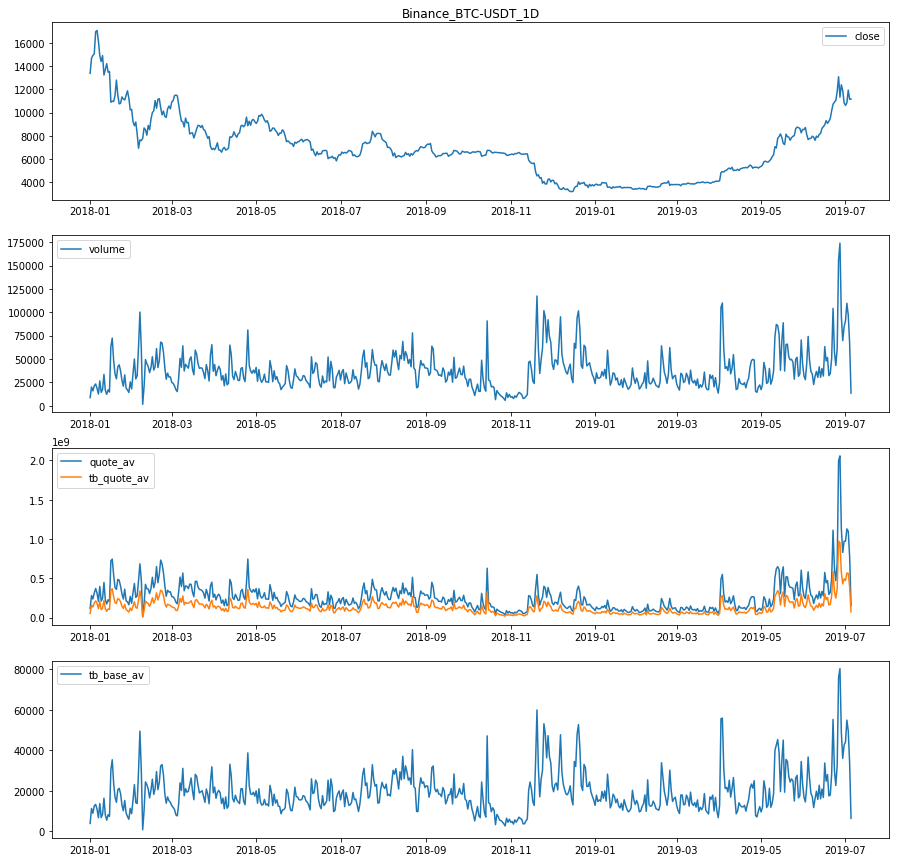

In [17]:
plt.figure(figsize=(15, 15))

plt.subplot(411)
plt.title('Binance_BTC-USDT_1D')
plt.plot(df_BTCUSDT_BN['close'])
plt.legend()

plt.subplot(412)
plt.plot(df_BTCUSDT_BN['volume'])
plt.legend()

plt.subplot(413)
plt.plot(df_BTCUSDT_BN['quote_av'])
plt.subplot(413)
plt.plot(df_BTCUSDT_BN['tb_quote_av'])
plt.legend()

plt.subplot(414)
plt.plot(df_BTCUSDT_BN['tb_base_av'])
plt.legend()

plt.show()

/home/aj/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


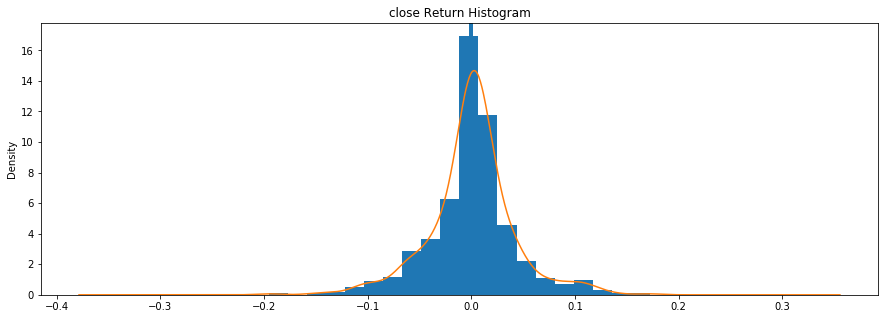

In [11]:
perf = df_BTCUSDT_BN['close'].calc_stats()
perf.plot_histogram();

In [52]:
perf.stats

start                    2018-01-01 00:00:00
end                      2019-07-05 00:00:00
rf                                         0
total_return                       -0.164988
cagr                                -0.11285
max_drawdown                       -0.811848
calmar                             -0.139004
mtd                                0.0293309
three_month                          1.23228
six_month                            1.96276
ytd                                  2.01722
one_year                            0.711153
three_year                          -0.11285
five_year                                NaN
ten_year                                 NaN
incep                               -0.11285
daily_sharpe                        0.204513
daily_sortino                        0.32556
daily_mean                          0.134397
daily_vol                           0.657158
daily_skew                         -0.101516
daily_kurt                           2.69371
best_day  